# Histogram Backprojection on Grayscale

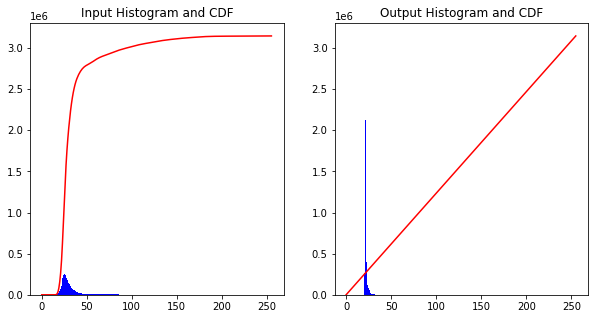

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input grayscale image
img = cv2.imread('dark_galaxy.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the input CDF
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

# Define the desired CDF
desired_cdf = np.linspace(0, 1, 256)

# Compute the mapping function using backpropagation
mapping = np.interp(desired_cdf, cdf_normalized, bins[:-1])
mapped_img = np.interp(img.flatten(), bins[:-1], mapping).astype(np.uint8)
mapped_img = mapped_img.reshape(img.shape)

# Plot the input and output histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
ax[0].plot(cdf_normalized * img.size, color='red')
ax[0].set_title('Input Histogram and CDF')

ax[1].hist(mapped_img.flatten(), 256, [0, 256], color='blue')
ax[1].plot(desired_cdf * img.size, color='red')
ax[1].set_title('Output Histogram and CDF')

# Show the images
plt.show()

# Save the output image
cv2.imwrite('mapped_galaxy.jpg', mapped_img)
